# Analytics Vidhya Lord  Of the Machines Hackathon

This Notebook is the EDA notebook of the hackathon, where in we aim to predict whether the link within an email will be clicked by a user or not. for this purpose we have to combine the train and test data with the campaign data and analyze them together 

1. load the data
2. merge the data
3. check the unique features
4. have a look at target variable distribution
5. create new features
6. analyze the features and compare it with positive labels 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
%matplotlib inline
from IPython.display import display
pd.set_option('display.max_columns',200)


train_df=pd.read_csv('train.csv')
campaign=pd.read_csv('campaign_data.csv')
test_df=pd.read_csv('test_BDIfz5B.csv')

In [2]:
train_df.head()

,id,user_id,campaign_id,send_date,is_open,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,0
1,52_134438,134438,52,02-11-2017 12:53,0,0
2,33_181789,181789,33,24-07-2017 15:15,0,0
3,44_231448,231448,44,05-09-2017 11:36,0,0
4,29_185580,185580,29,01-07-2017 18:01,0,0


In [3]:
train_df.shape

(1023191, 6)

In [4]:
campaign.head()

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


In [5]:
campaign.shape


(52, 9)

In [6]:
test_df.head()

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15
2,57_96189,57,96189,05-01-2018 18:25
3,56_166917,56,166917,02-01-2018 08:15
4,56_172838,56,172838,02-01-2018 08:12


In [7]:
test_df.shape

(773858, 4)

In [8]:
train_merge=pd.merge(train_df,campaign,on='campaign_id',how='left')

In [9]:
train_merge.head()

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,42_14051,14051,42,01-09-2017 19:55,0,0,Newsletter,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...
1,52_134438,134438,52,02-11-2017 12:53,0,0,Newsletter,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...
2,33_181789,181789,33,24-07-2017 15:15,0,0,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...
3,44_231448,231448,44,05-09-2017 11:36,0,0,Upcoming Events,60,56,19,6,"[September Events]\r\n \r\nDear AVians,\r\n \r...","[September] Data Science Hackathons, Meetups a...",http://r.newsletters.analyticsvidhya.com/7veam...
4,29_185580,185580,29,01-07-2017 18:01,0,0,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...


In [10]:
test_merge=pd.merge(test_df,campaign,on='campaign_id',how='left')

In [11]:
test_merge.head()

,id,campaign_id,user_id,send_date,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,63_122715,63,122715,01-02-2018 22:35,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
1,56_76206,56,76206,02-01-2018 08:15,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...
2,57_96189,57,96189,05-01-2018 18:25,Upcoming Events,40,36,15,4,"[January - Hiring Hackathons, LearnUps, Contes...","[January 2018] Upcoming Hiring Hackathons, Lea...",http://r.newsletters.analyticsvidhya.com/7w43t...
3,56_166917,56,166917,02-01-2018 08:15,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...
4,56_172838,56,172838,02-01-2018 08:12,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...


In [12]:
train_merge['user_id'].value_counts()

183177    20
145022    20
4118      19
216700    19
114180    19
197188    19
47152     19
163618    18
69970     18
196296    18
122065    18
218458    18
114075    18
38127     18
162109    18
67867     18
163399    18
156029    18
157374    18
36788     18
92799     18
49136     18
28463     18
160443    18
117705    18
86941     18
152991    18
143179    18
185773    18
111959    18
          ..
9258       1
1070       1
146480     1
60010      1
39524      1
48059      1
43618      1
156523     1
23463      1
21414      1
37685      1
230364     1
17199      1
134125     1
170356     1
182903     1
190842     1
178809     1
124304     1
85381      1
97281      1
171007     1
78593      1
228376     1
173048     1
185334     1
181236     1
2854       1
138223     1
188649     1
Name: user_id, Length: 168236, dtype: int64

The No of users is quite high. Let us now separate the positive labels and store it in a diff variable and do comparison analysis

In [13]:
#splitting target from features and merging training and testing set for analysis
clicked=train_merge[train_merge.is_click==1]
y=train_merge['is_click']
train_merge.drop(['is_click','is_open'],axis=1,inplace=True)
len_train=len(train_merge)
train_merge=train_merge.append(test_merge)
train_merge.shape

(1797049, 12)

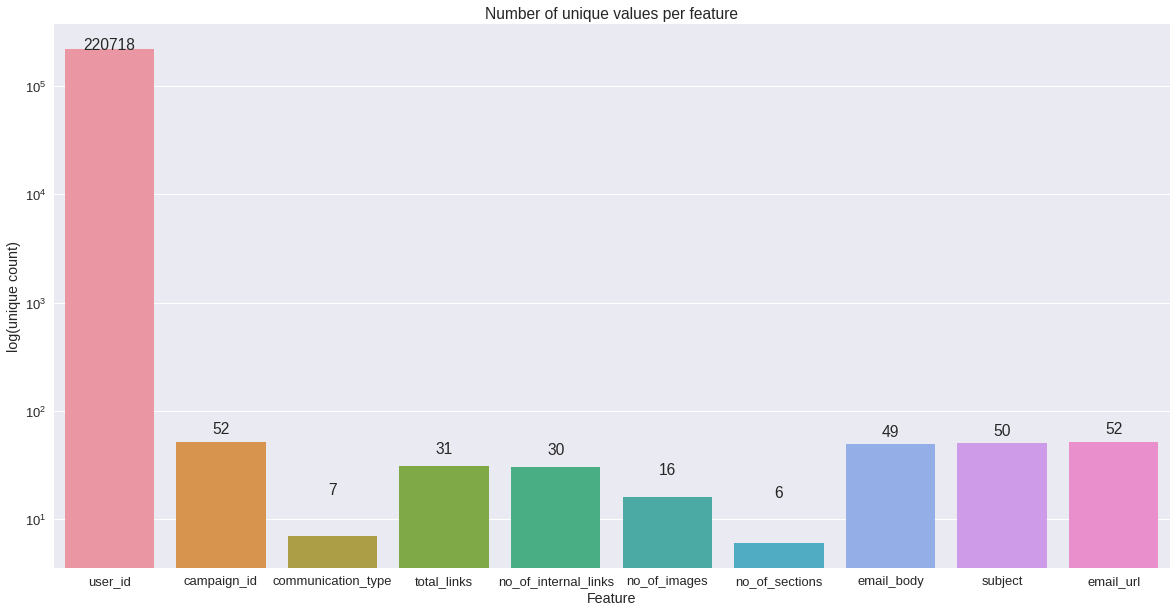

In [14]:
import seaborn as sns 
plt.figure(figsize=(20,10))

cols=['user_id','campaign_id','communication_type','total_links','no_of_internal_links','no_of_images',
      'no_of_sections','email_body','subject','email_url']
uniques=[len(set(train_merge[col])) for col in cols]
sns.set(font_scale=1.3)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [15]:
train_merge.describe()

,campaign_id,no_of_images,no_of_internal_links,no_of_sections,total_links,user_id
count,1.797049e+06,1.797049e+06,1.797049e+06,1.797049e+06,1.797049e+06,1.797049e+06
mean,5.257310e+01,1.072762e+01,5.574471e+01,3.173332e+00,6.088747e+01,1.204793e+05
std,1.440181e+01,4.889017e+00,4.350553e+01,1.693655e+00,4.500491e+01,6.947336e+04
min,2.900000e+01,1.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00
25%,4.200000e+01,7.000000e+00,1.900000e+01,1.000000e+00,2.400000e+01,6.047100e+04
50%,5.300000e+01,1.200000e+01,5.600000e+01,4.000000e+00,6.000000e+01,1.201750e+05
75%,6.400000e+01,1.500000e+01,6.400000e+01,4.000000e+00,7.500000e+01,1.804290e+05
max,8.000000e+01,1.900000e+01,1.910000e+02,6.000000e+00,2.030000e+02,2.409900e+05


### Feature engineering steps 
1. have a look at emails received by each user
2. communication type count of each type
3. use the top clickers of emails as a characteristic
4. use of time based features and their counts

In [16]:
train_merge['received'] = train_merge.groupby('user_id')['user_id'].transform('count')
train_merge['com_count']=train_merge.groupby('communication_type')['communication_type'].transform('count')

In [17]:
top_clickers=clicked['user_id'].value_counts()[:100]
train_merge['top_clicker']=0
sum(top_clickers)

470

In [18]:
train_merge['top_clicker']=np.where(train_merge.user_id.isin(top_clickers),1,train_merge['top_clicker'])

train_merge['day']=pd.to_datetime(train_merge.send_date).dt.day.astype('uint8')
train_merge['dow']=pd.to_datetime(train_merge.send_date).dt.dayofweek.astype('uint8')
train_merge['month']=pd.to_datetime(train_merge.send_date).dt.month.astype('uint8')
train_merge['week']=pd.to_datetime(train_merge.send_date).dt.week.astype('uint8')

train_merge.drop(['send_date'],axis=1,inplace=True)
train_merge['count_day']=train_merge.groupby('day')['day'].transform('count')
train_merge['count_day'] = np.where(train_merge.day.isin([0,1,2,3,4,5]),0, train_merge['count_day'])

train_merge.head()

,campaign_id,communication_type,email_body,email_url,id,no_of_images,no_of_internal_links,no_of_sections,subject,total_links,user_id,received,com_count,top_clicker,day,dow,month,week,count_day
0,42,Newsletter,"September Newsletter\r\n \r\nDear AVians,\r\n ...",http://r.newsletters.analyticsvidhya.com/7v3rd...,42_14051,13,79,4,[September] Exciting days ahead with DataHack ...,88,14051,16,742759,0,9,0,1,2,126073
1,52,Newsletter,"November Newsletter\r\n \r\nDear AVians,\r\n \...",http://r.newsletters.analyticsvidhya.com/7vtb2...,52_134438,10,62,4,[Newsletter] Stage for DataHack Summit 2017 is...,67,134438,11,742759,0,11,5,2,6,167591
2,33,Others,Fireside Chat with DJ Patil - the master is he...,http://r.newsletters.analyticsvidhya.com/7uvlg...,33_181789,1,3,1,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",7,181789,13,50936,0,24,0,7,30,40939
3,44,Upcoming Events,"[September Events]\r\n \r\nDear AVians,\r\n \r...",http://r.newsletters.analyticsvidhya.com/7veam...,44_231448,19,56,6,"[September] Data Science Hackathons, Meetups a...",60,231448,11,451089,0,9,1,5,19,126073
4,29,Newsletter,"Dear AVians,\r\n \r\nWe are shaping up a super...",http://r.newsletters.analyticsvidhya.com/7um44...,29_185580,12,61,3,Sneak Peek: A look at the emerging data scienc...,67,185580,7,742759,0,7,5,1,1,138885


In [19]:
clicked['day']=pd.to_datetime(clicked.send_date).dt.day.astype('uint8')
clicked['dow']=pd.to_datetime(clicked.send_date).dt.dayofweek.astype('uint8')
clicked['month']=pd.to_datetime(clicked.send_date).dt.month.astype('uint8')
clicked['week']=pd.to_datetime(clicked.send_date).dt.week.astype('uint8')
clicked.drop(['send_date'],axis=1,inplace=True)
clicked.head()

,id,user_id,campaign_id,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,day,dow,month,week
109,30_62110,62110,30,1,1,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...,7,6,5,18
213,48_73007,73007,48,1,1,Newsletter,203,191,12,4,"\r\nOctober Newsletter\r\n \r\nDear AVians,\r\...",[October 2017] - Just a month to go! DataHack ...,http://r.newsletters.analyticsvidhya.com/7vlxl...,10,4,2,6
269,42_8759,8759,42,1,1,Newsletter,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...,9,0,1,2
410,32_194328,194328,32,1,1,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...,19,2,7,29
418,35_150594,150594,35,1,1,Others,9,2,1,1,Fireside Chat with DJ Patil - Watch Live!\r\n ...,Watch Live: Fireside Chat with DJ Patil,http://r.newsletters.analyticsvidhya.com/7ux6c...,29,5,7,30


### checking the differences between subject, url, body counts, campaign can be used instead of url as they are collinear

In [20]:
subject=train_merge['subject'].value_counts().values
email_url=train_merge['email_url'].value_counts().values
body=train_merge['email_body'].value_counts().values
print(len(subject),len(email_url),len(body))

50 52 49


In [21]:
a=[i for i in email_url if i not in body]
print (a)

[9831, 5559, 5322, 2838, 2829, 2288]


In [22]:
b=[i for i in email_url if i not in subject]
print(b)

[60337, 48322, 2531, 2373]


In [23]:
c=[i for i in subject if i not in body]
print(c)

[108659, 9831, 5559, 5322, 4904, 2838, 2829, 2288]


### plotting features and comparing them

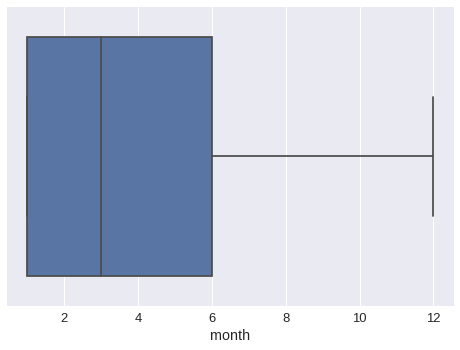

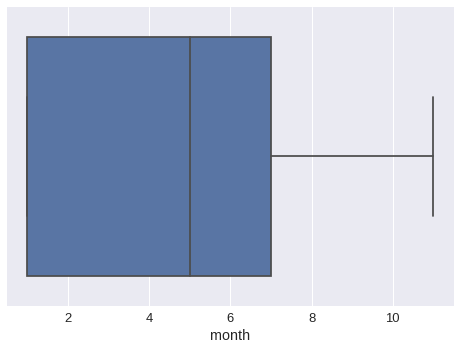

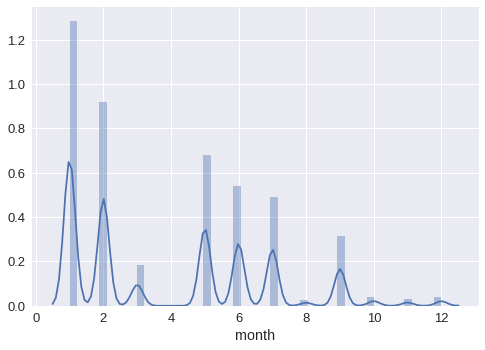

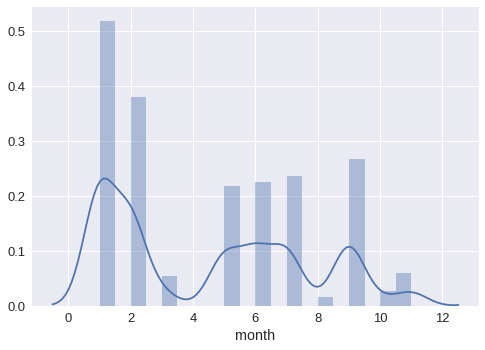

1     507566
2     362438
5     268378
6     213507
7     193393
9     124334
3      73415
10     16264
12     15984
11     11257
8      10513
Name: month, dtype: int64

In [24]:
import seaborn as sns

sns.boxplot(train_merge['month'])
plt.show()
sns.boxplot(clicked['month'])
plt.show()
sns.distplot(train_merge['month'])
plt.show()
sns.distplot(clicked['month'])
plt.show()

train_merge['month'].value_counts()

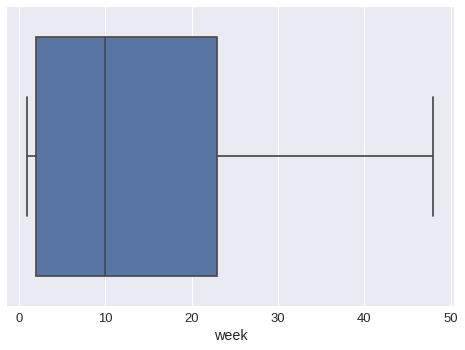

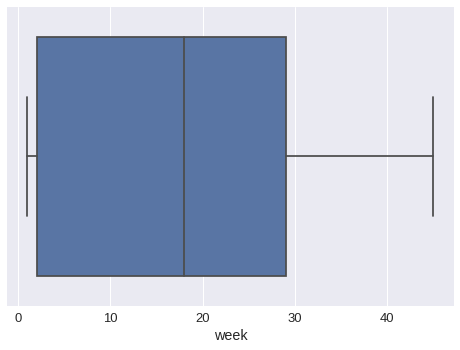

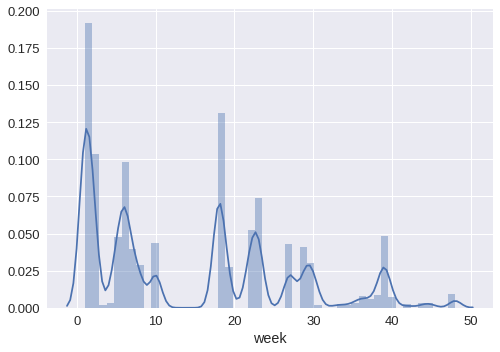

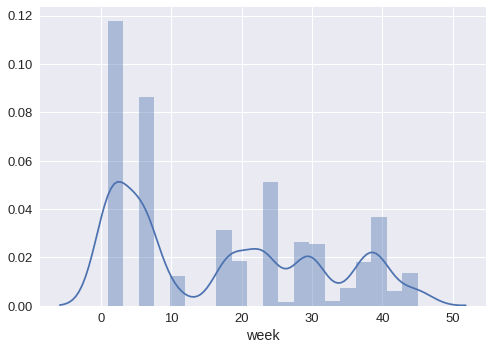

6     2426
2     2005
23    1436
1     1305
39    1038
18     880
29     738
30     717
19     517
45     380
10     350
37     271
38     238
42     170
36     161
33      58
27      49
34      41
35       2
Name: week, dtype: int64

In [25]:
sns.boxplot(train_merge['week'])
plt.show()
sns.boxplot(clicked['week'])
plt.show()
sns.distplot(train_merge['week'])
plt.show()
sns.distplot(clicked['week'])
plt.show()



clicked['week'].value_counts()

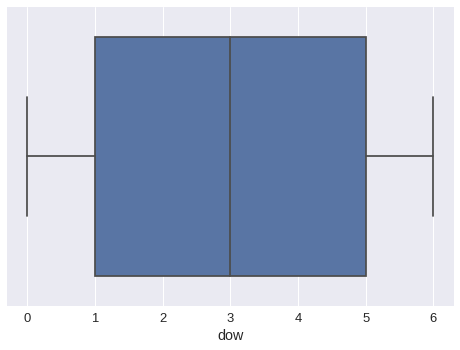

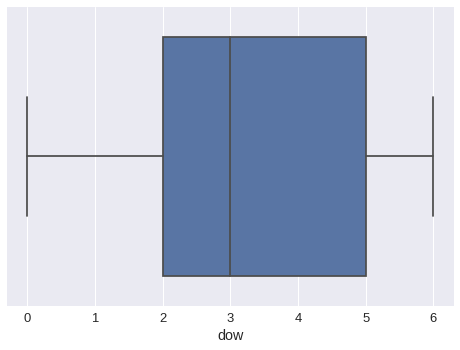

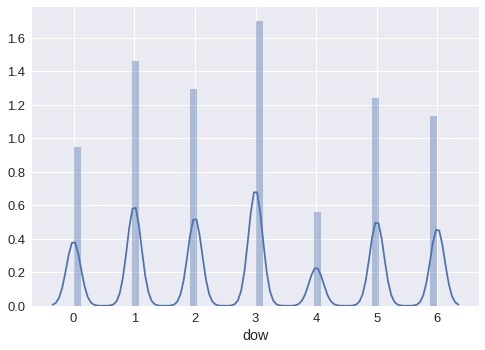

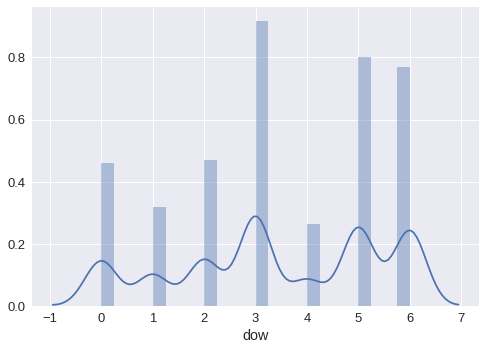

3    2931
5    2558
6    2459
2    1502
0    1469
1    1018
4     845
Name: dow, dtype: int64

In [26]:
sns.boxplot(train_merge['dow'])
plt.show()
sns.boxplot(clicked['dow'])
plt.show()
sns.distplot(train_merge['dow'])
plt.show()
sns.distplot(clicked['dow'])
plt.show()
clicked['dow'].value_counts()

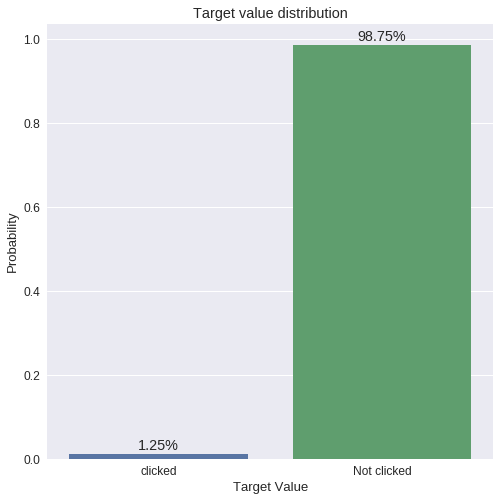

In [30]:
#let us see the distribution of target variable
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
mean = (y.values == 1).mean()
ax = sns.barplot(['clicked','Not clicked'], [mean, 1-mean])
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

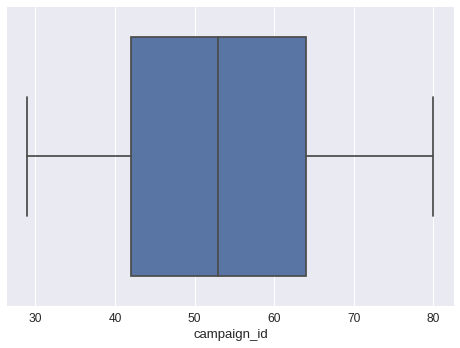

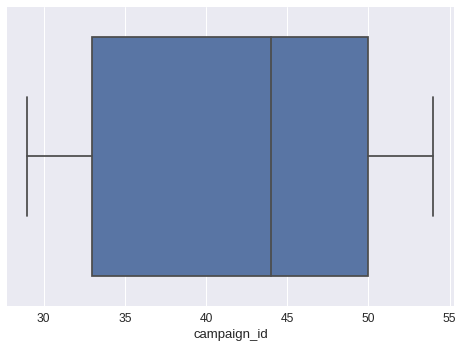

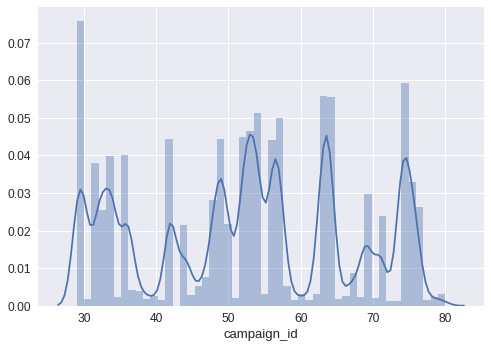

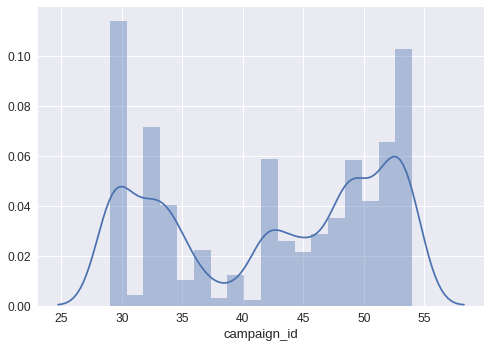

74    108862
63    102135
64    101911
54     93943
57     91555
53     85431
52     82160
49     81358
42     81253
56     80709
36     73415
34     73112
30     69756
32     69624
29     69129
75     60337
69     54522
48     51456
76     48322
33     46815
71     43712
50     39710
44     39498
67     15984
47     14230
46      9831
58      9553
37      7559
38      7232
60      5935
55      5559
62      5544
45      5322
40      4822
66      4583
68      4364
78      4121
35      4121
51      3882
70      3715
39      3487
79      3460
65      3407
31      3192
77      2838
59      2829
41      2786
61      2709
73      2531
72      2373
80      2288
43        67
Name: campaign_id, dtype: int64

In [31]:
sns.boxplot(train_merge['campaign_id'])
plt.show()
sns.boxplot(clicked['campaign_id'])
plt.show()
sns.distplot(train_merge['campaign_id'])
plt.show()
sns.distplot(clicked['campaign_id'])
plt.show()

train_merge['campaign_id'].value_counts()

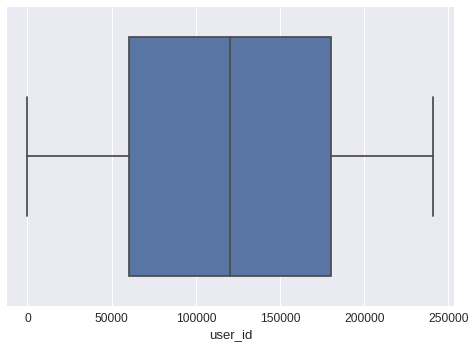

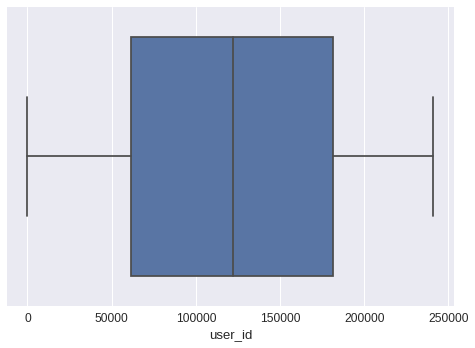

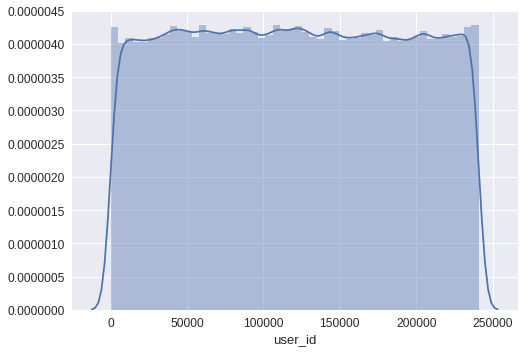

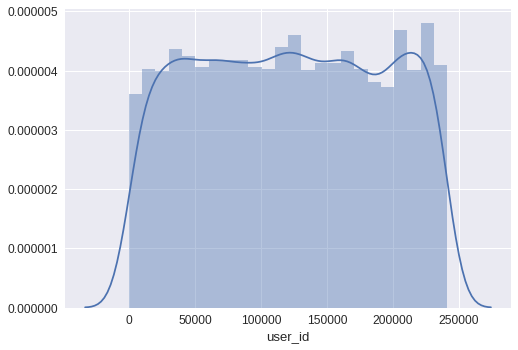

In [32]:
sns.boxplot(train_merge['user_id'])
plt.show()
sns.boxplot(clicked['user_id'])
plt.show()
sns.distplot(train_merge['user_id'])
plt.show()
sns.distplot(clicked['user_id'])
plt.show()

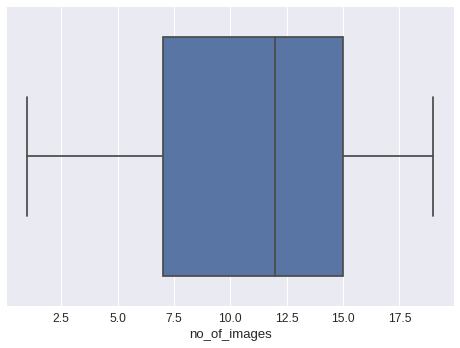

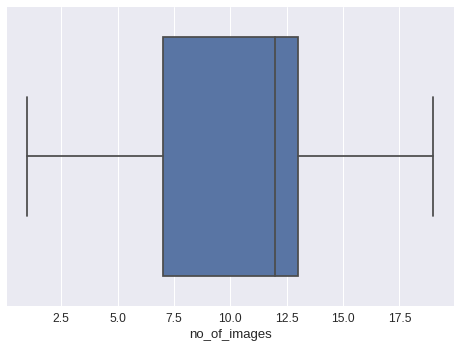

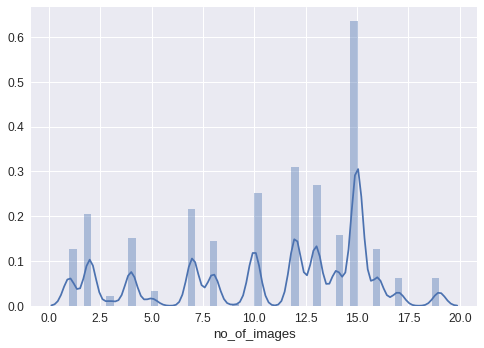

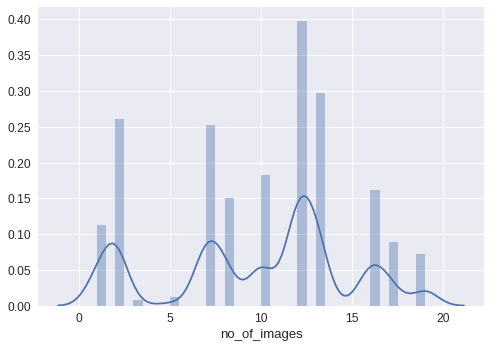

In [33]:
sns.boxplot(train_merge['no_of_images'])
plt.show()
sns.boxplot(clicked['no_of_images'])
plt.show()
sns.distplot(train_merge['no_of_images'])
plt.show()
sns.distplot(clicked['no_of_images'])
plt.show()

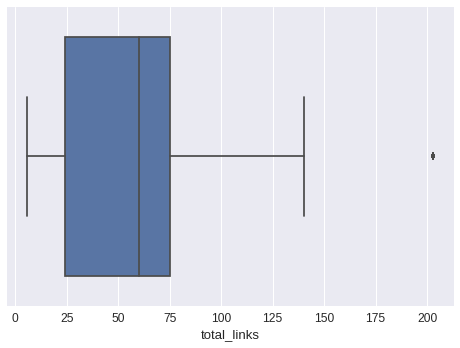

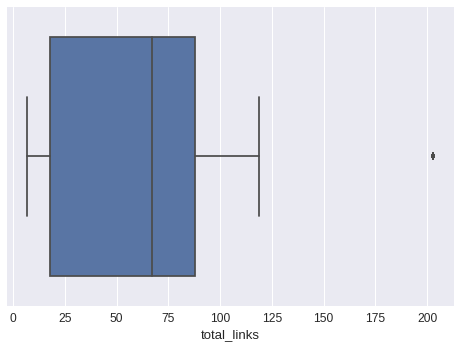

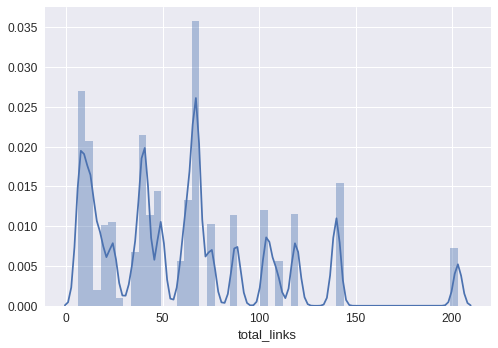

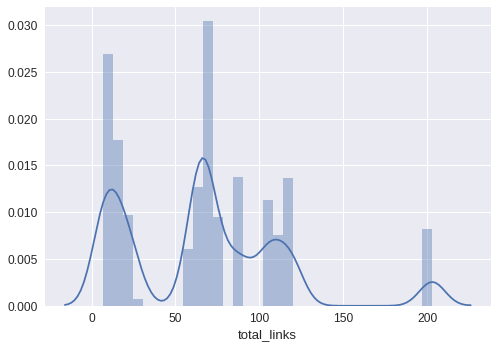

In [34]:
sns.boxplot(train_merge['total_links'])
plt.show()
sns.boxplot(clicked['total_links'])
plt.show()
sns.distplot(train_merge['total_links'])
plt.show()
sns.distplot(clicked['total_links'])
plt.show()

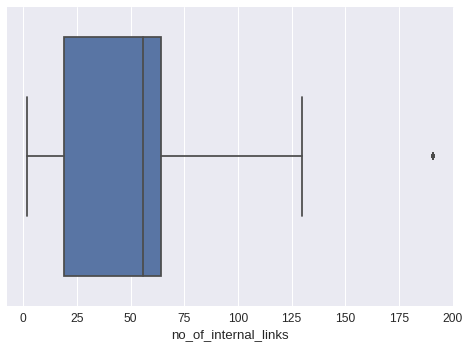

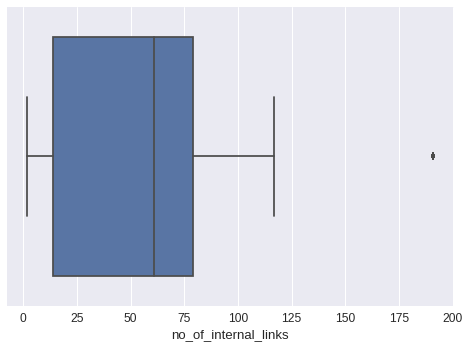

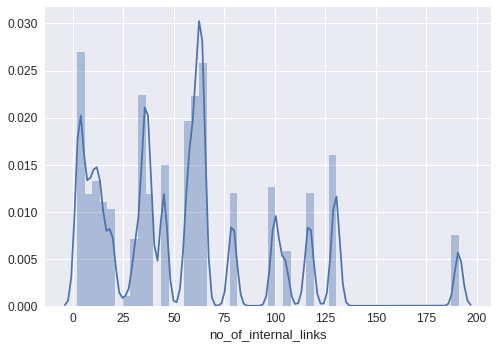

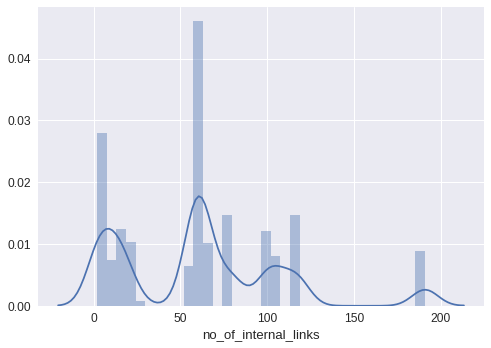

In [35]:
sns.boxplot(train_merge['no_of_internal_links'])
plt.show()
sns.boxplot(clicked['no_of_internal_links'])
plt.show()
sns.distplot(train_merge['no_of_internal_links'])
plt.show()
sns.distplot(clicked['no_of_internal_links'])
plt.show()

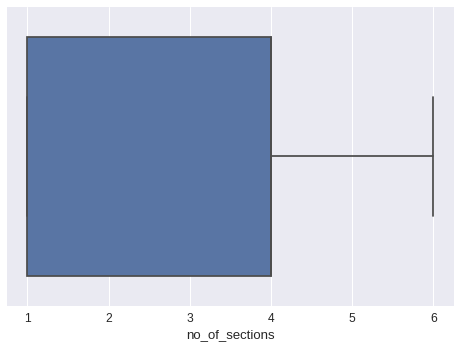

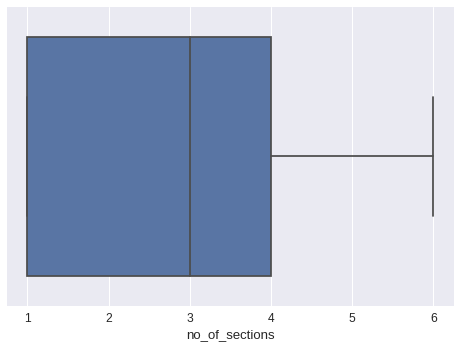

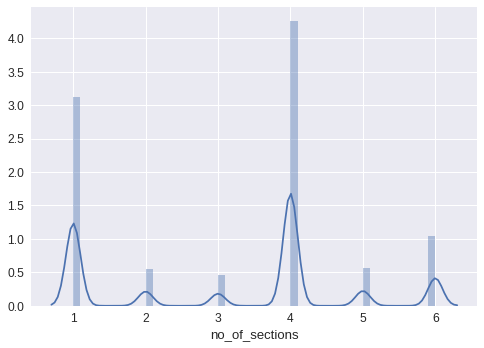

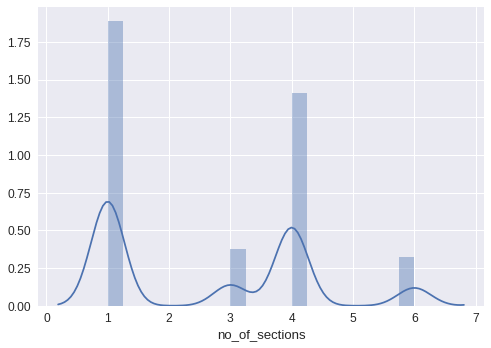

In [36]:
sns.boxplot(train_merge['no_of_sections'])
plt.show()
sns.boxplot(clicked['no_of_sections'])
plt.show()
sns.distplot(train_merge['no_of_sections'])
plt.show()
sns.distplot(clicked['no_of_sections'])
plt.show()

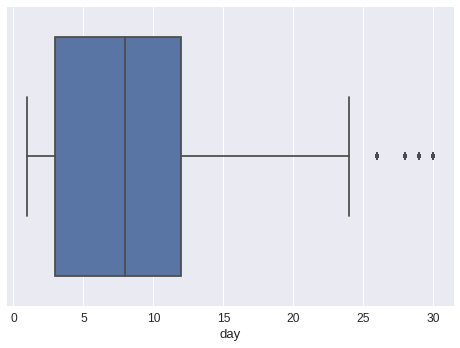

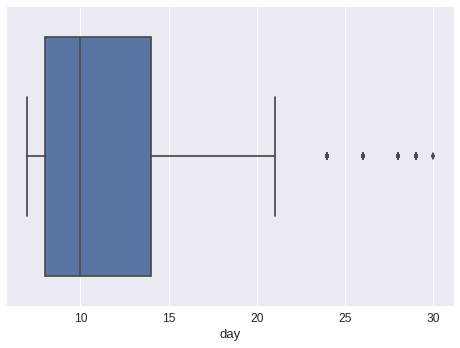

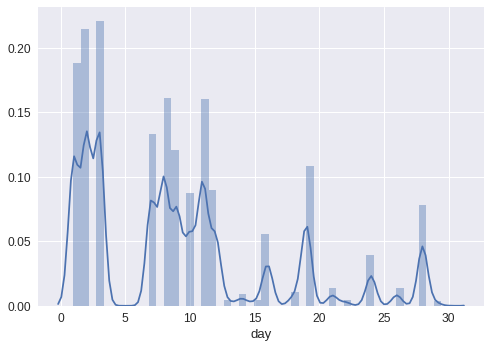

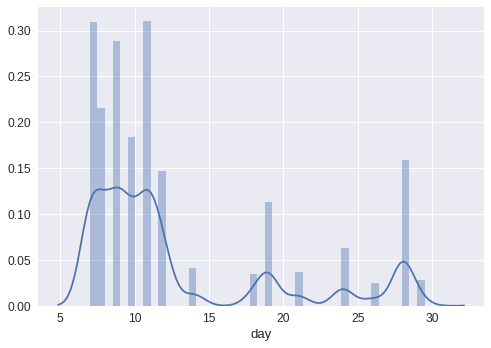

In [37]:
sns.boxplot(train_merge['day'])
plt.show()
sns.boxplot(clicked['day'])
plt.show()
sns.distplot(train_merge['day'])
plt.show()
sns.distplot(clicked['day'])
plt.show()

In [38]:
sns.boxplot(train_merge['hour'])
plt.show()
sns.boxplot(clicked['hour'])
plt.show()
sns.distplot(train_merge['hour'])
plt.show()
sns.distplot(clicked['hour'])
plt.show()

KeyError: 'hour'

In [ ]:
train_merge['communication_type'].value_counts().plot()
plt.show()
clicked['communication_type'].value_counts().plot()
plt.show()

In [39]:
clicked['communication_type'].value_counts(),train_merge['communication_type'].value_counts()

(Newsletter         5658
 Conference         3228
 Upcoming Events    1916
 Hackathon          1059
 Others              717
 Webinar             161
 Corporate            43
 Name: communication_type, dtype: int64, Newsletter         742759
 Upcoming Events    451089
 Conference         332633
 Hackathon          177932
 Others              50936
 Corporate           38213
 Webinar              3487
 Name: communication_type, dtype: int64)

hackathons receive a lot more clicks in the clicked section

In [40]:
train_merge['subject'].value_counts()

[March Newsletter] AV Android App, DataHack Premier League, AVBytes and other exciting announcements !                      108862
[March 2018] It's Back: McKinsey Analytics Online Hackathon and more machine learning contests                              108659
AVbytes, Ultimate 2018 learning path and awesome contests coming up                                                         102135
[February 2018] Upcoming Hiring Hackathons, Data Science Contests, Practice Problems, Events and much more                  101911
[November Updates] - Announcing DataFest 2018, Mumbai                                                                        93943
[January 2018] Upcoming Hiring Hackathons, LearnUps, Data Science Contests & More                                            91555
[Register Now] Just 2 days to go for India's biggest action in Artificial Intelligence & Machine Learning.                   85431
[Newsletter] Stage for DataHack Summit 2017 is set! Announcing new hackathons, arti

In [41]:
clicked['subject'].value_counts()

[Newsletter] Stage for DataHack Summit 2017 is set! Announcing new hackathons, articles and job opportunities !    1166
Sneak Peek: A look at the emerging data science world !                                                            1144
[September] Exciting days ahead with DataHack Summit 2017, Hackathons, Meetups and more!                           1042
Register @ DataHack Summit 2017 - India's Largest Conference On Artificial Intelligence & Machine Learning         1038
[November Updates] - Announcing DataFest 2018, Mumbai                                                               963
[July] Data Science Expert Meetups & Competitions coming your way                                                   880
[Register Now] Just 2 days to go for India's biggest action in Artificial Intelligence & Machine Learning.          862
A.I. & Machine Learning: 5 reasons why you should attend DataHack Summit 2017                                       738
[AV Newsletter] Fireside Chat with DJ Pa

In [42]:
train_merge['email_url'].value_counts()

http://r.newsletters.analyticsvidhya.com/7ww0uvb5p4c.html?t=1520940826    108862
http://r.newsletters.analyticsvidhya.com/7whsuvb5p4c.html?t=1520948095    102135
http://r.newsletters.analyticsvidhya.com/7wjn87b5p4c.html?t=1520947394    101911
http://r.newsletters.analyticsvidhya.com/7vzmmvb5p4c.html?t=1520964319     93943
http://r.newsletters.analyticsvidhya.com/7w43tjb5p4c.html?t=1520963048     91555
http://r.newsletters.analyticsvidhya.com/7vv5g7b5p4c.html?t=1520965166     85431
http://r.newsletters.analyticsvidhya.com/7vtb2vb5p4c.html?t=1520965166     82160
http://r.newsletters.analyticsvidhya.com/o7ohwml8lxh3f.html                81358
http://r.newsletters.analyticsvidhya.com/7v3rdjb5p4c.html?t=1521180188     81253
http://r.newsletters.analyticsvidhya.com/7w3uc7b5p4c.html?t=1520963048     80709
http://r.newsletters.analyticsvidhya.com/7uxpavb5p4c.html?t=1521180195     73415
http://r.newsletters.analyticsvidhya.com/7uwwuvb5p4c.html?t=1521180195     73112
http://r.newsletters.analyti

In [43]:
clicked['email_body'].value_counts()

November Newsletter\r\n \r\nDear AVians,\r\n \r\nThis month is going to be big huge. The stage for DataHack Summit 2017 is set. This is your last chance to grab the last few tickets left. 30 sessions, 10 hack sessions, 6 workshops - there can not be a bigger event than this. The Final agenda would be up in a few hours for the entire conference! Check out this small teaser and buy your tickets here.\r\n\r\nComing up in November, you stand a chance to win an all-expenses-paid International trip to any Analytics Conference with McKinsey Analytics Online Hackathon . Also, grab a chance to win exciting prizes with our upcoming Data Science Hackathon: Churn Prediction .\r\n\r\nOn the resources front, check out the Art of creating data stories, comprehensive guide to get started with Julia , common tasks in NLP and various activation functions in Deep Learning.\r\n\r\nKeeping it short as I am off to Bangalore to deliver DataHack Summit 2017 . See you there.\r\n\r\nRegards,\r\nKunal Jain\r\n  

As per my intution, the unique counts gives a clue that the last three columns would be rendered one and the same,i.e add no extra value and can be represented as one column instead. Hence we will drop the other two columns, let us keep the subject column and drop email_url and email_body. we can confirm this by checking the correlation matrix, we will have to encode the categorical variables for it. But, it is common sense that mass emails with same links , will have the same subject and body, hence we avoid the confirmation.

### no_of_sections needs to be dropped as it is indentical in both clicked and entire dataset, seeming to have no effect whatsoever.

In [44]:
train_merge.drop(['email_url','email_body','no_of_sections','subject'],inplace=True,axis=1)


In [45]:
train_merge.head()

,campaign_id,communication_type,id,no_of_images,no_of_internal_links,total_links,user_id,received,com_count,top_clicker,day,dow,month,week,count_day
0,42,Newsletter,42_14051,13,79,88,14051,16,742759,0,9,0,1,2,126073
1,52,Newsletter,52_134438,10,62,67,134438,11,742759,0,11,5,2,6,167591
2,33,Others,33_181789,1,3,7,181789,13,50936,0,24,0,7,30,40939
3,44,Upcoming Events,44_231448,19,56,60,231448,11,451089,0,9,1,5,19,126073
4,29,Newsletter,29_185580,12,61,67,185580,7,742759,0,7,5,1,1,138885


# let us have a look at the sample submission to know our target variable for further analysis

In [46]:
sub=pd.read_csv('sample_submission_4fcZwvQ.csv')
sub.head()

,id,is_click
0,63_122715,0
1,56_76206,0
2,57_96189,0
3,56_166917,0
4,56_172838,0


# Multivariate analysis and one-hot encoding of categorical variables

In [47]:
cat=['communication_type','campaign_id']
train_merge=pd.get_dummies(train_merge,columns=cat)
train_merge.tail()


,id,no_of_images,no_of_internal_links,total_links,user_id,received,com_count,top_clicker,day,dow,month,week,count_day,communication_type_Conference,communication_type_Corporate,communication_type_Hackathon,communication_type_Newsletter,communication_type_Others,communication_type_Upcoming Events,communication_type_Webinar,campaign_id_29,campaign_id_30,campaign_id_31,campaign_id_32,campaign_id_33,campaign_id_34,campaign_id_35,campaign_id_36,campaign_id_37,campaign_id_38,campaign_id_39,campaign_id_40,campaign_id_41,campaign_id_42,campaign_id_43,campaign_id_44,campaign_id_45,campaign_id_46,campaign_id_47,campaign_id_48,campaign_id_49,campaign_id_50,campaign_id_51,campaign_id_52,campaign_id_53,campaign_id_54,campaign_id_55,campaign_id_56,campaign_id_57,campaign_id_58,campaign_id_59,campaign_id_60,campaign_id_61,campaign_id_62,campaign_id_63,campaign_id_64,campaign_id_65,campaign_id_66,campaign_id_67,campaign_id_68,campaign_id_69,campaign_id_70,campaign_id_71,campaign_id_72,campaign_id_73,campaign_id_74,campaign_id_75,campaign_id_76,campaign_id_77,campaign_id_78,campaign_id_79,campaign_id_80
773853,74_202929,15,130,140,202929,7,742759,0,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
773854,56_95437,10,38,42,95437,7,742759,0,1,3,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
773855,63_11063,15,64,68,11063,11,742759,0,2,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
773856,72_144182,5,15,22,144182,30,38213,0,22,3,2,8,4904,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
773857,57_226299,15,36,40,226299,16,451089,0,1,1,5,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
ix=train_merge.columns
x=(ix[1:])

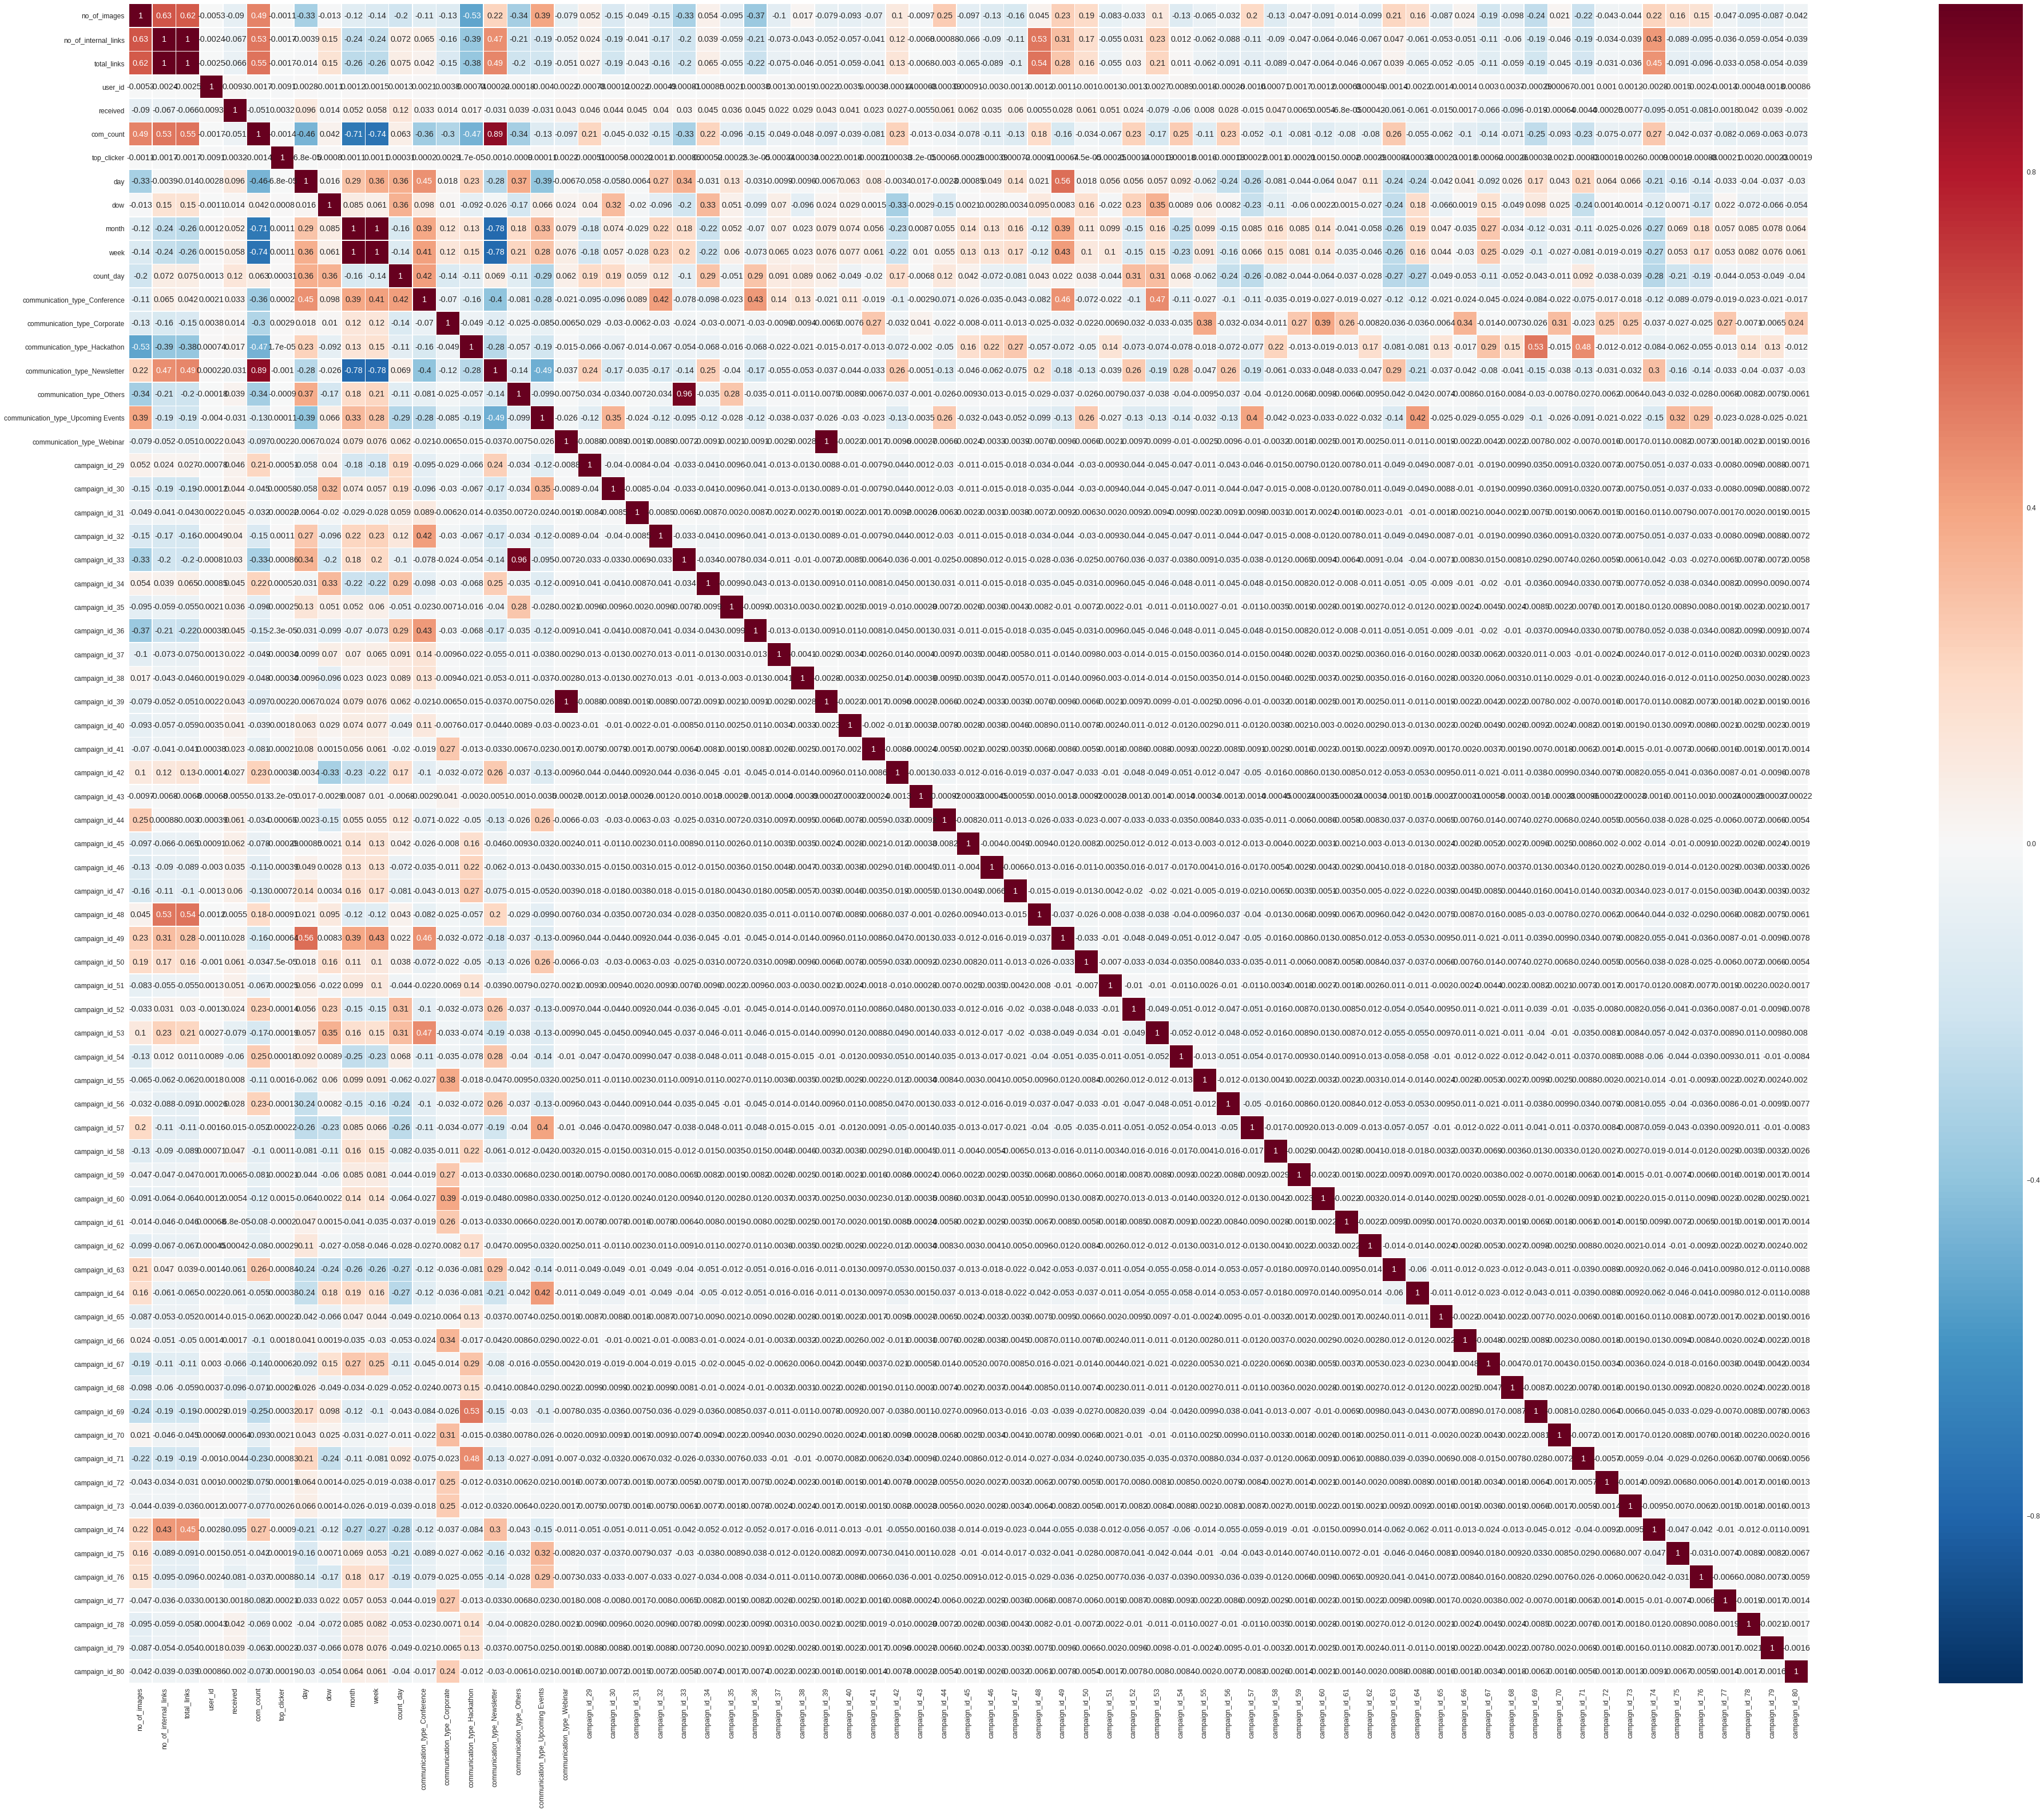

In [49]:
corrmat=train_merge[x]
f, ax = plt.subplots(figsize=(82, 54))
plt.xticks(rotation='90')

corrmat=pd.DataFrame(corrmat,columns=corrmat.columns).corr()
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

In [50]:
train_merge.drop(['no_of_internal_links','campaign_id_39'],axis=1,inplace=True)
train_merge.head()

,id,no_of_images,total_links,user_id,received,com_count,top_clicker,day,dow,month,week,count_day,communication_type_Conference,communication_type_Corporate,communication_type_Hackathon,communication_type_Newsletter,communication_type_Others,communication_type_Upcoming Events,communication_type_Webinar,campaign_id_29,campaign_id_30,campaign_id_31,campaign_id_32,campaign_id_33,campaign_id_34,campaign_id_35,campaign_id_36,campaign_id_37,campaign_id_38,campaign_id_40,campaign_id_41,campaign_id_42,campaign_id_43,campaign_id_44,campaign_id_45,campaign_id_46,campaign_id_47,campaign_id_48,campaign_id_49,campaign_id_50,campaign_id_51,campaign_id_52,campaign_id_53,campaign_id_54,campaign_id_55,campaign_id_56,campaign_id_57,campaign_id_58,campaign_id_59,campaign_id_60,campaign_id_61,campaign_id_62,campaign_id_63,campaign_id_64,campaign_id_65,campaign_id_66,campaign_id_67,campaign_id_68,campaign_id_69,campaign_id_70,campaign_id_71,campaign_id_72,campaign_id_73,campaign_id_74,campaign_id_75,campaign_id_76,campaign_id_77,campaign_id_78,campaign_id_79,campaign_id_80
0,42_14051,13,88,14051,16,742759,0,9,0,1,2,126073,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,52_134438,10,67,134438,11,742759,0,11,5,2,6,167591,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33_181789,1,7,181789,13,50936,0,24,0,7,30,40939,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44_231448,19,60,231448,11,451089,0,9,1,5,19,126073,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,29_185580,12,67,185580,7,742759,0,7,5,1,1,138885,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
train_merge.shape

(1797049, 70)

Two features are highly correlated with 2 other features , we can Although it may differ in future, if there are events of same categories with different subjects as communication type is correlating with subjects, we can remove them in this dataset only with the assumption that the relation is maintained. Although it may not hold true in future.

Since campaign.csv is a different file, we will get to know the relaionships, as test set will have the same campaigns

this is a temporary analysis, based on further analysis, clicked.py file will be generated

